# Data Analysis

Analysis of the provided datasets.

## space-weather files

Load and analyze the data from the `parquet` files.

### In Google CoLab

In [ ]:
#!pip install pandas pyarrow google-auth-httplib2 google-auth-oauthlib

In [1]:
# Use it only when work in the CoLab:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path

data_dir = '/content/drive/MyDrive/Private (1)/Projects/PerceptiveSpace/TakeHome/data'
original_data_dir = 'ml-engineer-take-home-data'
file_name = 'space-weather-2000.parquet'
file_path = Path(data_dir) / original_data_dir / file_name
file_path

PosixPath('/content/drive/MyDrive/Private (1)/Projects/PerceptiveSpace/TakeHome/data/ml-engineer-take-home-data/space-weather-2000.parquet')

### Local Jupyter Lab

My current Google CoLab accound does not allow me to work with big (>10GB) files easily. So, I'll proceed with my local environment (my laptop).

In [2]:
from pathlib import Path

data_dir = '../data'
original_data_dir = 'original'
file_name = 'space-weather-2000.parquet'
file_path = Path(data_dir) / original_data_dir / file_name
file_path

PosixPath('../data/original/space-weather-2000.parquet')

In [3]:
import pandas as pd

df = pd.read_parquet(file_path)
df.head()

,datetime,F10,F10_avg,S10,S10_avg,M10,M10_avg,Y10,Y10_avg,DST_DTC
0,2000-01-01 00:00:00,130.1,166.0,143.7,170.4,125.0,163.0,146.4,158.7,136.125000
1,2000-01-01 00:30:00,130.1,166.0,143.7,170.4,125.0,163.0,146.4,158.7,137.038462
2,2000-01-01 01:00:00,130.1,166.0,143.7,170.4,125.0,163.0,146.4,158.7,137.821429
3,2000-01-01 01:30:00,130.1,166.0,143.7,170.4,125.0,163.0,146.4,158.7,138.500000
4,2000-01-01 02:00:00,130.1,166.0,143.7,170.4,125.0,163.0,146.4,158.7,139.093750


In [5]:
list(df.columns)

['datetime',
 'F10',
 'F10_avg',
 'S10',
 'S10_avg',
 'M10',
 'M10_avg',
 'Y10',
 'Y10_avg',
 'DST_DTC']

In [6]:
moment_df = df[df['datetime'] == '2000-01-01 01:00:00']
moment_df.shape

(1, 10)

In [7]:
moment_df.head(10)

,datetime,F10,F10_avg,S10,S10_avg,M10,M10_avg,Y10,Y10_avg,DST_DTC
2,2000-01-01 01:00:00,130.1,166.0,143.7,170.4,125.0,163.0,146.4,158.7,137.821429


In [10]:
correlations = df.corr()
print(correlations)

          datetime       F10   F10_avg       S10   S10_avg       M10  \
datetime  1.000000 -0.028663 -0.269982  0.135104  0.233035  0.093690   
F10      -0.028663  1.000000  0.283308  0.746800  0.268022  0.662736   
F10_avg  -0.269982  0.283308  1.000000  0.319446  0.732264  0.208789   
S10       0.135104  0.746800  0.319446  1.000000  0.484940  0.878509   
S10_avg   0.233035  0.268022  0.732264  0.484940  1.000000  0.315837   
M10       0.093690  0.662736  0.208789  0.878509  0.315837  1.000000   
M10_avg   0.251360  0.278343  0.742439  0.490897  0.990308  0.330417   
Y10       0.171251  0.634332  0.236249  0.759728  0.333793  0.762935   
Y10_avg   0.421827  0.238130  0.683828  0.410002  0.875514  0.263309   
DST_DTC   0.006877  0.057544 -0.042575  0.115243 -0.008000  0.040553   

           M10_avg       Y10   Y10_avg   DST_DTC  
datetime  0.251360  0.171251  0.421827  0.006877  
F10       0.278343  0.634332  0.238130  0.057544  
F10_avg   0.742439  0.236249  0.683828 -0.042575  
S10

In [11]:
correlations = df.corr()
print(correlations)

          datetime       F10   F10_avg       S10   S10_avg       M10  \
datetime  1.000000 -0.028663 -0.269982  0.135104  0.233035  0.093690   
F10      -0.028663  1.000000  0.283308  0.746800  0.268022  0.662736   
F10_avg  -0.269982  0.283308  1.000000  0.319446  0.732264  0.208789   
S10       0.135104  0.746800  0.319446  1.000000  0.484940  0.878509   
S10_avg   0.233035  0.268022  0.732264  0.484940  1.000000  0.315837   
M10       0.093690  0.662736  0.208789  0.878509  0.315837  1.000000   
M10_avg   0.251360  0.278343  0.742439  0.490897  0.990308  0.330417   
Y10       0.171251  0.634332  0.236249  0.759728  0.333793  0.762935   
Y10_avg   0.421827  0.238130  0.683828  0.410002  0.875514  0.263309   
DST_DTC   0.006877  0.057544 -0.042575  0.115243 -0.008000  0.040553   

           M10_avg       Y10   Y10_avg   DST_DTC  
datetime  0.251360  0.171251  0.421827  0.006877  
F10       0.278343  0.634332  0.238130  0.057544  
F10_avg   0.742439  0.236249  0.683828 -0.042575  
S10

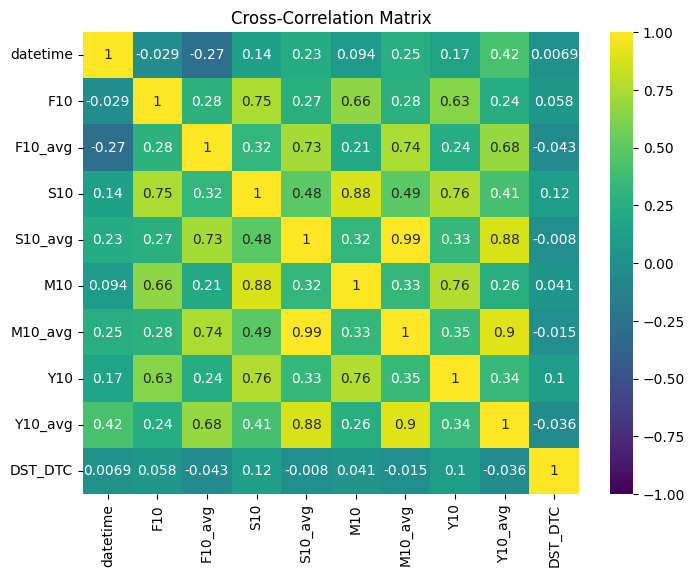

In [12]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Cross-Correlation Matrix')
plt.show()

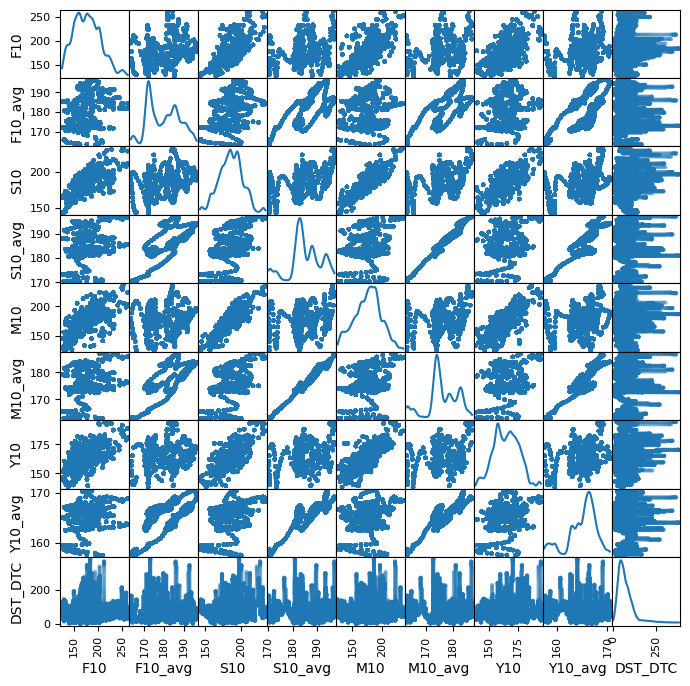

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.5, figsize=(8, 8), diagonal='kde')
plt.show()

In [5]:
desc = df.describe(include='all')
desc

,datetime,F10,F10_avg,S10,S10_avg,M10,M10_avg,Y10,Y10_avg,DST_DTC
count,17568,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000
mean,2000-07-01 23:45:00,179.536339,179.863934,185.464208,185.231148,176.348907,176.038525,164.911749,164.985792,69.262480
min,2000-01-01 00:00:00,126.000000,163.200000,142.100000,170.200000,125.000000,162.900000,138.300000,157.400000,0.354167
25%,2000-04-01 11:52:30,157.800000,172.500000,173.600000,182.000000,161.600000,173.500000,156.900000,163.400000,40.057292
50%,2000-07-01 23:45:00,177.700000,180.050000,185.300000,184.200000,177.850000,175.250000,165.100000,165.700000,59.125000
75%,2000-10-01 11:37:30,199.200000,186.000000,196.600000,189.600000,191.300000,180.600000,172.800000,166.900000,86.645833
max,2000-12-31 23:30:00,262.000000,196.400000,233.500000,197.200000,236.300000,187.000000,194.400000,170.500000,378.270833
std,NaN,29.079430,8.158396,17.489512,6.623435,22.874268,5.749297,11.343523,2.897371,45.224106


In [19]:
# validate if all samples are presented:

year_samples_num = 2 * 24 * 366 # 2 samples per hour; a leap year
year_samples_num

# 17568 equal the number of samples in the file hence all samples are presented and No NaNs.

17568

In [ ]:
!pip install sweetviz

In [20]:
# It produces the SWEETVIZ_REPORT.html

import sweetviz as sv

report = sv.analyze(df) 

                                             |      | [  0%]   00:00 -> (? left)

## Raw density files

In [1]:
import pandas as pd
import tarfile

In [2]:
from pathlib import Path

data_dir = '../data'
original_data_dir = 'original'
year = '2000'
file_name = f'density-{year}.tar'
file_path = Path(data_dir) / original_data_dir / file_name
file_path

PosixPath('../data/original/density-2000.tar')

In [5]:
# Extract all files from a TAR file:

# Get a list of all members (files and directories) in the archive

with tarfile.open(file_path, 'r') as tar:
  members = tar.getmembers()
  for i, member in enumerate(members):
    if '/' in member.name:  # a file
        date, file_name = member.name.split('=')[1].split('/')
        where = Path(data_dir) / original_data_dir / year / f"{date}.parquet"
        tar.extract(member.name, path=where)
        print(where)
        if i > 12: break
  print("Extracted files:", i-1)

../data/original/2000/2000-01-01.parquet
../data/original/2000/2000-01-02.parquet
Extracted files: 2


In [71]:
# Rename files: '2000-01-01.e744a8ed50e64f5b8f56d3bab9f2cd1d-0.parquet' -> '2000-01-01.parquet'
import os

data_dir = '../data'
original_data_dir = 'original'
year = '2000'
directory = Path(data_dir) / original_data_dir / year

# Iterate over all the files in the directory
n = 0
for filename in os.listdir(directory):
    old_file_path = os.path.join(directory, filename)    
    new_filename = filename.split('.')[0] + '.parquet'
    new_file_path = os.path.join(directory, new_filename)
    os.rename(old_file_path, new_file_path)
    

print(f"{n} files have been renamed.")

366 files have been renamed.


### File anomalies

In [27]:
# Are all files with the same # of samples?

import os
from pathlib import Path

from collections import Counter

lengths = [] # Counter()

# Specify the directory path
directory = Path(data_dir) / original_data_dir  / str(year)
file_names = os.listdir(directory)
# print(file_names)

for ff in file_names:
    print('.', end='')
    lengths.append(len(pd.read_parquet(directory / ff)))

res = Counter(lengths)
res

..............................................................................................................................................................................................................................................................................................................................................................................

Counter({9120912: 354,
         4593744: 2,
         9120606: 1,
         9120898: 1,
         9120902: 1,
         9120720: 1,
         9120672: 1,
         9120895: 1,
         9120722: 1,
         9120480: 1,
         9120732: 1,
         9120822: 1})

In [28]:
# What are files that have "broken" lengths?

for ff in os.listdir(directory):
    l = len(pd.read_parquet(directory / ff))
    if l != 9120912:
        print(f"{ff} len: {l}")


2000-12-30.73390a90a7be41cb8426f3921613b49b-0.parquet len: 4593744
2000-12-31.88a3d27ea28349ccbbd8ae3376512c9c-0.parquet len: 4593744
2000-10-15.e175ed82c7cc4f99984eb70ca25a3cf1-0.parquet len: 9120606
2000-02-09.c20d8fff3c6440a6a33b6ebbe94a0460-0.parquet len: 9120898
2000-12-10.419508b94f0349f182e78a8e02e2a2eb-0.parquet len: 9120902
2000-01-21.ad3ba62fecc746ff875714f87bab3531-0.parquet len: 9120720
2000-12-14.3f86e3eaf2fa41c8b1768769ffde5dc1-0.parquet len: 9120672
2000-10-13.b8e8bd278afb41daa5caee68baa7e8ee-0.parquet len: 9120895
2000-05-28.efbe09804e86473c8f73b01c06217900-0.parquet len: 9120722
2000-04-25.b885ebc152fb42bd8a9a873a94288434-0.parquet len: 9120480
2000-05-06.9dc276b3a3534b5dae4cacbdb826a562-0.parquet len: 9120732
2000-04-26.ec0dd1474bed45b8943fe3ee56ada25b-0.parquet len: 9120822


#### Conclusions

1. 12 files have anomalies in the number of samples. 
    For this project I safely assume, these files are broken. I'll remove these files from training and evaluation.
    For now, I assume all files have the same number of samples.

2. These dimensions have a constant number of unique values:
    - latitude (19,)
    - longitude (73,)
    - altitude (137,)
    - datetime (48,)
    
    Hence, the number of rows in the most of files equals 9120912.

In [48]:
19*73*137*48

9120912

### Some observations

In [44]:
file_name = '2000-01-01.parquet'
file_path = Path('../data/original/2000') / file_name
# reorder columns
df_raw = pd.read_parquet(file_path, columns=['datetime', 'date','latitude',	'longitude', 'altitude', 'local_solar_time','density'])
df_raw.head()

,datetime,date,latitude,longitude,altitude,local_solar_time,density
0,2000-01-01,2000-01-01,-90.0,-180.0,120.0,12.0,1.682600e-08
1,2000-01-01,2000-01-01,-90.0,-180.0,125.0,12.0,9.893600e-09
2,2000-01-01,2000-01-01,-90.0,-180.0,130.0,12.0,6.349600e-09
3,2000-01-01,2000-01-01,-90.0,-180.0,135.0,12.0,4.369200e-09
4,2000-01-01,2000-01-01,-90.0,-180.0,140.0,12.0,3.173900e-09


In [70]:
len(df_raw)

9120912

In [45]:
df_raw.tail()

,datetime,date,latitude,longitude,altitude,local_solar_time,density
9120907,2000-01-01 23:30:00,2000-01-01,90.0,180.0,780.0,11.5,1.329200e-14
9120908,2000-01-01 23:30:00,2000-01-01,90.0,180.0,785.0,11.5,1.268300e-14
9120909,2000-01-01 23:30:00,2000-01-01,90.0,180.0,790.0,11.5,1.211100e-14
9120910,2000-01-01 23:30:00,2000-01-01,90.0,180.0,795.0,11.5,1.157500e-14
9120911,2000-01-01 23:30:00,2000-01-01,90.0,180.0,800.0,11.5,1.107200e-14


In [46]:
# It is interesting, how local_solar_time is switched in the noon, from 23.5 to 0

middle = df_raw.shape[0]//2
print(middle)
df_raw[middle-5:middle+5]

4560456


,datetime,date,latitude,longitude,altitude,local_solar_time,density
4560451,2000-01-01 11:30:00,2000-01-01,90.0,180.0,780.0,23.5,1.801100e-14
4560452,2000-01-01 11:30:00,2000-01-01,90.0,180.0,785.0,23.5,1.714500e-14
4560453,2000-01-01 11:30:00,2000-01-01,90.0,180.0,790.0,23.5,1.633000e-14
4560454,2000-01-01 11:30:00,2000-01-01,90.0,180.0,795.0,23.5,1.556400e-14
4560455,2000-01-01 11:30:00,2000-01-01,90.0,180.0,800.0,23.5,1.484300e-14
4560456,2000-01-01 12:00:00,2000-01-01,-90.0,-180.0,120.0,0.0,1.686800e-08
4560457,2000-01-01 12:00:00,2000-01-01,-90.0,-180.0,125.0,0.0,9.932600e-09
4560458,2000-01-01 12:00:00,2000-01-01,-90.0,-180.0,130.0,0.0,6.384000e-09
4560459,2000-01-01 12:00:00,2000-01-01,-90.0,-180.0,135.0,0.0,4.398500e-09
4560460,2000-01-01 12:00:00,2000-01-01,-90.0,-180.0,140.0,0.0,3.198500e-09


In [8]:
desc = df_raw.describe(include='all')
desc

,datetime,date,latitude,longitude,altitude,local_solar_time,density
count,9120912,9120912,9.120912e+06,9.120912e+06,9.120912e+06,9.120912e+06,9.120912e+06
unique,NaN,1,NaN,NaN,NaN,NaN,NaN
top,NaN,2000-01-01,NaN,NaN,NaN,NaN,NaN
freq,NaN,9120912,NaN,NaN,NaN,NaN,NaN
mean,2000-01-01 11:45:00.000000640,NaN,0.000000e+00,0.000000e+00,4.600000e+02,1.191438e+01,5.303945e-10
min,2000-01-01 00:00:00,NaN,-9.000000e+01,-1.800000e+02,1.200000e+02,0.000000e+00,7.932200e-15
25%,2000-01-01 05:52:30,NaN,-5.000000e+01,-9.000000e+01,2.900000e+02,5.958333e+00,1.340000e-13
50%,2000-01-01 11:45:00,NaN,0.000000e+00,0.000000e+00,4.600000e+02,1.191667e+01,1.669400e-12
75%,2000-01-01 17:37:30,NaN,5.000000e+01,9.000000e+01,6.300000e+02,1.787500e+01,3.565200e-11
max,2000-01-01 23:30:00,NaN,9.000000e+01,1.800000e+02,8.000000e+02,2.383333e+01,3.401000e-08


In [52]:
df_raw.dtypes

datetime            datetime64[ns]
date                      category
latitude                   float32
longitude                  float32
altitude                   float32
local_solar_time           float32
density                    float32
dtype: object

- No NaNs !
- `latitude`, `longitude`, `altitude` can be int

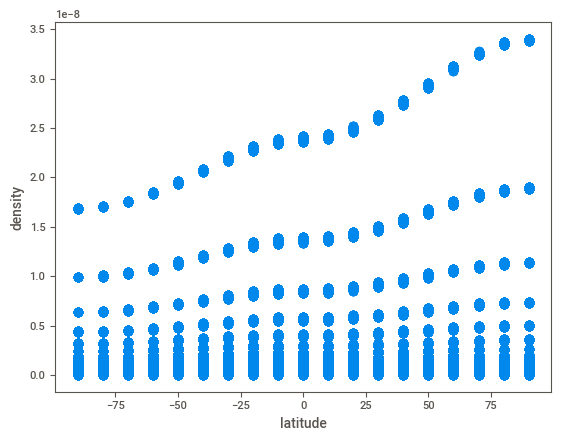

In [45]:
from matplotlib import pyplot as plt

df_raw.plot(kind='scatter', x='latitude', y='density', s=32, alpha=.8)
plt.show()

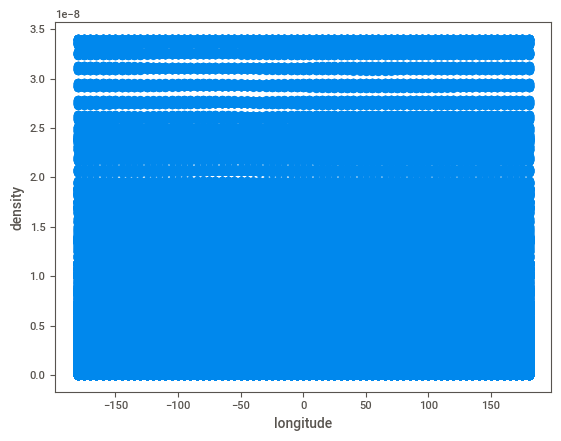

In [46]:
df_raw.plot(kind='scatter', x='longitude', y='density', s=32, alpha=.8)
plt.show()

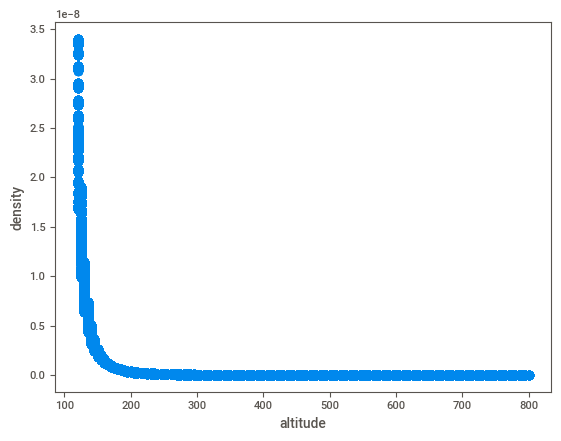

In [47]:
df_raw.plot(kind='scatter', x='altitude', y='density', s=32, alpha=.8)
plt.show()

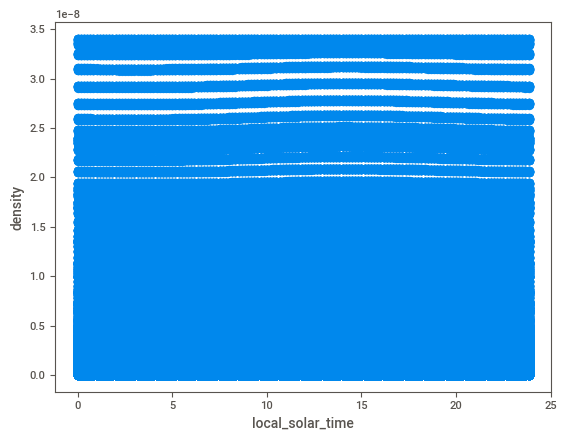

In [49]:
df_raw.plot(kind='scatter', x='local_solar_time', y='density', s=32, alpha=.8)
plt.show()

In [48]:
df_raw[df_raw['datetime'] == '2000-01-01 23:30:00']

,datetime,local_solar_time,latitude,longitude,altitude,density,date
8930893,2000-01-01 23:30:00,11.5,-90.0,-180.0,120.0,1.681700e-08,2000-01-01
8930894,2000-01-01 23:30:00,11.5,-90.0,-180.0,125.0,9.877600e-09,2000-01-01
8930895,2000-01-01 23:30:00,11.5,-90.0,-180.0,130.0,6.332000e-09,2000-01-01
8930896,2000-01-01 23:30:00,11.5,-90.0,-180.0,135.0,4.352700e-09,2000-01-01
8930897,2000-01-01 23:30:00,11.5,-90.0,-180.0,140.0,3.159100e-09,2000-01-01
...,...,...,...,...,...,...,...
9120907,2000-01-01 23:30:00,11.5,90.0,180.0,780.0,1.329200e-14,2000-01-01
9120908,2000-01-01 23:30:00,11.5,90.0,180.0,785.0,1.268300e-14,2000-01-01
9120909,2000-01-01 23:30:00,11.5,90.0,180.0,790.0,1.211100e-14,2000-01-01
9120910,2000-01-01 23:30:00,11.5,90.0,180.0,795.0,1.157500e-14,2000-01-01


In [69]:
moment_df_raw = df_raw[df_raw['datetime'] == '2000-01-01 01:00:00']
moment_df_raw.shape

(190019, 7)

In [ ]:
df_raw.

In [53]:
_ = [print(name, df_raw[name].unique().shape) for name in df_raw.columns if name != 'density']


datetime (48,)
local_solar_time (144,)
latitude (19,)
longitude (73,)
altitude (137,)
date (1,)


In [54]:
numb = 48 * 144 * 19 * 73 * 137
numb

1313411328

In [68]:
9120912 / (19*73*137), 19*73*137

(48.0, 190019)

In [56]:
# local_solar_time is not in multiplicators!

sorted(df_raw['local_solar_time'].unique().tolist())[:10]

[0.0,
 0.16666999459266663,
 0.3333300054073334,
 0.5,
 0.666670024394989,
 0.833329975605011,
 1.0,
 1.1666699647903442,
 1.3333300352096558,
 1.5]

In [ ]:
# for each datetime we have 72 unique local_solar_time
# local_solar_time intervals are 10 minutes.
# datetime intervals are 30 minutes.

In [66]:
one_moment = df_raw[df_raw['datetime'] == '2000-01-01 00:00:00']['local_solar_time'].unique()
one_moment.shape, sorted(one_moment)

((72,),
 [0.0,
  0.33333,
  0.66667,
  1.0,
  1.33333,
  1.66667,
  2.0,
  2.33333,
  2.66667,
  3.0,
  3.33333,
  3.66667,
  4.0,
  4.33333,
  4.66667,
  5.0,
  5.33333,
  5.66667,
  6.0,
  6.33333,
  6.66667,
  7.0,
  7.33333,
  7.66667,
  8.0,
  8.33333,
  8.66667,
  9.0,
  9.33333,
  9.66667,
  10.0,
  10.33333,
  10.66667,
  11.0,
  11.33333,
  11.66667,
  12.0,
  12.33333,
  12.66667,
  13.0,
  13.33333,
  13.66667,
  14.0,
  14.33333,
  14.66667,
  15.0,
  15.33333,
  15.66667,
  16.0,
  16.33333,
  16.66667,
  17.0,
  17.33333,
  17.66667,
  18.0,
  18.33333,
  18.66667,
  19.0,
  19.33333,
  19.66667,
  20.0,
  20.33333,
  20.66667,
  21.0,
  21.33333,
  21.66667,
  22.0,
  22.33333,
  22.66667,
  23.0,
  23.33333,
  23.66667])

In [40]:
one_moment = df_raw[df_raw['datetime'] == '2000-01-01 00:00:00']
one_moment.shape

(190019, 7)

In [ ]:
import sweetviz as sv

report = sv.analyze(df_raw) 

# Display the report in Colab (or save as HTML)
# report.show_notebook()
report.show_html("SQEETVIZ_REPORT.html")

## Data preprocessing

Here I evaluated different options of the input preprocessing.

In [66]:
"""
This code creates a multidimensional array to hold value of 'density'.

"""
import pandas as pd
import numpy as np

# Example DataFrame
data = {
    'datetime': ['2024-10-18 12:00:00', '2024-10-18 12:00:00', '2024-10-18 13:00:00'],
    'latitude': [45.0, 45.0, 46.0],
    'longitude': [-75.0, -76.0, -75.0],
    'altitude': [300, 300, 350],
    'local_solar_time': ['12:30', '12:30', '13:30'],
    'density': [1.2, 1.3, 1.1]
}

# Convert datetime strings to pandas datetime objects
df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'])

# Set the multi-index
df.set_index(['datetime', 'latitude', 'longitude', 'altitude'], inplace=True)

# Get unique values for each dimension
datetimes = df.index.get_level_values('datetime').unique()
latitudes = df.index.get_level_values('latitude').unique()
longitudes = df.index.get_level_values('longitude').unique()
altitudes = df.index.get_level_values('altitude').unique()

# Create an empty multidimensional array to hold the 'density' values
tensor_shape = (len(datetimes), len(latitudes), len(longitudes), len(altitudes))
density_tensor = np.full(tensor_shape, [np.nan, np.nan])  # Initialize with NaNs

# Populate the tensor with density values
for idx, row in df.iterrows():
    datetime_idx = np.where(datetimes == idx[0])[0][0]
    latitude_idx = np.where(latitudes == idx[1])[0][0]
    longitude_idx = np.where(longitudes == idx[2])[0][0]
    altitude_idx = np.where(altitudes == idx[3])[0][0]
    
    # Fill in the 'density' value into the correct location in the tensor
    density_tensor[datetime_idx, latitude_idx, longitude_idx, altitude_idx] = row['density'] # , row['local_solar_time']]

# Display the multidimensional tensor with 'density' values
print(density_tensor)


[[[[1.2 nan]
   [1.3 nan]]

  [[nan nan]
   [nan nan]]]


 [[[nan nan]
   [nan nan]]

  [[nan 1.1]
   [nan nan]]]]


In [69]:
"""
This code creates a multidimensional array to hold vectors of ['density', 'local_solar_time'].

"""

import pandas as pd
import numpy as np

# Example DataFrame
data = {
    'datetime': ['2024-10-18 12:00:00', '2024-10-18 12:00:00', '2024-10-18 13:00:00'],
    'latitude': [45.0, 45.0, 46.0],
    'longitude': [-75.0, -76.0, -75.0],
    'altitude': [300, 300, 350],
    'local_solar_time': [11, 22, 33],
    'density': [1.2, 1.3, 1.1]
}

# Convert datetime strings to pandas datetime objects
df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'])

# Set the multi-index
df.set_index(['datetime', 'latitude', 'longitude', 'altitude'], inplace=True)

# Get unique values for each dimension
datetimes = df.index.get_level_values('datetime').unique()
latitudes = df.index.get_level_values('latitude').unique()
longitudes = df.index.get_level_values('longitude').unique()
altitudes = df.index.get_level_values('altitude').unique()

# Create an empty multidimensional array to hold vectors of ['density', 'local_solar_time']
tensor_shape = (len(datetimes), len(latitudes), len(longitudes), len(altitudes))
tensor = np.full(tensor_shape, None, dtype=object)  # Initialize with None (or you can use NaNs)

# Populate the tensor with vectors [density, local_solar_time]
for idx, row in df.iterrows():
    datetime_idx = np.where(datetimes == idx[0])[0][0]
    latitude_idx = np.where(latitudes == idx[1])[0][0]
    longitude_idx = np.where(longitudes == idx[2])[0][0]
    altitude_idx = np.where(altitudes == idx[3])[0][0]
    
    # Fill in the vector [density, local_solar_time] into the correct location in the tensor
    tensor[datetime_idx, latitude_idx, longitude_idx, altitude_idx] = np.array([row['density'], row['local_solar_time']])

# Display the multidimensional tensor with vectors [density, local_solar_time]
print(tensor)


[[[[array([ 1.2, 11. ]) None]
   [array([ 1.3, 22. ]) None]]

  [[None None]
   [None None]]]


 [[[None None]
   [None None]]

  [[None array([ 1.1, 33. ])]
   [None None]]]]


### Prepare Input

#### Hypothesis: stable structure of files

I have a hypothesis: 
- all files with a stable number of rows (9120912) have a stable structure.
  The elements in these "index" fields, ['datetime' (time part of it), 'latitude',	'longitude', 'altitude', 'local_solar_time'] ,
  always have the same combinations in groups of 30 min (this group is defined as a `model sample`). Also, these    combinations are placed in the same order in rows of "stable" files. If this hypothesis is true, I can format the model input as a sequence of vectors without explicitly providing the "index" field values but only the "density" values.

Let's verify this hypothesis.

In [3]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

# reorder columns
def read_df(file_name, dir_path=Path('../data/original/2000'), stable_size=9120912, remove_date=True,
           verbose=False):
    file_path = dir_path / file_name    
    if remove_date:
        columns = ['datetime', 'latitude',	'longitude', 'altitude', 'local_solar_time','density']
    else:
        columns = ['datetime', 'date','latitude',	'longitude', 'altitude', 'local_solar_time','density']

    df = pd.read_parquet(file_path, columns=columns)
    if verbose:
        print(f"Loaded {file_name} {df.shape}")
    if len(df) != stable_size:
        print(f"  {file_name} rows: {len(df)} != {stable_size}")
        return None
    date_from_file_name = file_name.split('.')[0]
    if not remove_date:
        if date_from_file_name != df.loc[0, 'date']:
            print(f"  {file_name}[0] has wrong 'date' value: {df.loc[0, 'date']}")
            print(df[0])
            return None
    dt = df['datetime'][0].strftime('%Y-%m-%d')
    if date_from_file_name != dt:
        print(f"  {file_name}[0] has wrong 'datetime' value: {dt}")
        print(df[0])
        return None
    return df


file_name = '2000-01-01.parquet'
df = read_df(file_name)
df.shape

(9120912, 6)

In [5]:
def compare_dfs(df1, df2):
    assert df1.shape == df2.shape, f"DataFrames should be the same shape: {df1.shape} != {df2.shape}"
    i = 0
    # # with itertuples():
    # for row1, row2 in zip(df1.itertuples(), df2.itertuples()):
    #     if pd.to_datetime(row1[0]).time() != pd.to_datetime(row2[0]).time():
    #         print(f"{i}: {pd.to_datetime(row1[0]).time()} != {pd.to_datetime(row2[0]).time()}")
    #     if row1[2:-1] != row2[2:-1]:
    #         print(f"{i}: {row1[2:-1]} != {row2[2:-1]} :: {row1=} {row2=}")
    #     i += 1
    
    # with iterrows (the same speed as itertuples):
    # for (index1, row1), (index2, row2) in zip(df1.iterrows(), df2.iterrows()):
    #     if row1['datetime'].time() != row2['datetime'].time():
    #         raise ValueError(f"{index1}: {row1['datetime'].time()} != {row2['datetime'].time()}")
    #     for field in ['latitude',	'longitude', 'altitude', 'local_solar_time']:
    #         if row1[field] != row2[field]:
    #             raise ValueError(f"{index1}: {row1} != {row2}")
    
    # the fastest but fails:
    if not df1['datetime'].dt.time.equals(df2['datetime'].dt.time):
        raise ValueError(f"datetime is not equal in df1 and df2")
    for field in ['latitude', 'longitude', 'altitude', 'local_solar_time']:
        if not df1[field].equals(df2[field]):
            raise ValueError(f"{field} is not equal in df1 and df2")
            
    # # the most generic:
    # if df1[['latitude', 'longitude', 'altitude', 'local_solar_time']].equals(
    #     df2[['latitude', 'longitude', 'altitude', 'local_solar_time']]
    # ):
    #     raise ValueError(f"df1  is not equal df2. {list(df1.columns)} {list(df2.columns)}")

    return True
    

file_name1 = '2000-01-01.parquet'
df1 = read_df(file_name1, verbose=True)
file_name2 = '2000-01-02.parquet'
df2 = read_df(file_name2, verbose=True)
compare_dfs(df1, df2)


Loaded 2000-01-01.parquet (9120912, 6)
Loaded 2000-01-02.parquet (9120912, 6)


True

In [ ]:
import os

data_dir = '../data'
original_data_dir = 'original'
year = '2000'
directory = Path(data_dir) / original_data_dir / year

# Iterate over all the files in the directory. 
# Exclude files with rows != 9120912

df1, df2 = None, None
for filename in sorted(os.listdir(directory)):
    if df1 is None:
        df1 = read_df(filename, verbose=True)
        continue
    else:
        df2 = read_df(filename, verbose=True)
        if df2 is not None:
            compare_dfs(df1, df2)


#### Conclusion

The hypothesis is true. 
All files with a stable number of rows (9120912) have a stable structure.
  The elements in these "index" fields, ['datetime' (time part of it), 'latitude', 'longitude', 'altitude', 'local_solar_time'] ,
  always have the same combinations in groups of 30 min (this group is defined as a model sample). 
  These    combinations are placed in the same rows in "stable" files.

### Reducing Samples

I need "just enough" data to show that the model converges to create a baseline solution.

After the baseline is created, the next step would be to train the model on all available data.


I can preprocess the original .parquet files by removing all but `datetime` and `density` fields and group rows by `datetime`.

In [7]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

def save_file(df, file_name, dir_path=Path('../data/reduced/2000'), verbose=False):
    os.makedirs(dir_path, exist_ok=True)
    file_path = dir_path / file_name
    df.to_parquet(file_path)
    if verbose:
        print(f"Saved {file_path} {df.shape}")
    

file_name = '2000-01-01.parquet'
save_file(df1, file_name, verbose=True)
               
df_new = read_df(file_name, dir_path=Path('../data/reduced/2000'), verbose=True)
df_new.shape

Saved ../data/reduced/2000/2000-01-01.parquet (9120912, 6)
Loaded 2000-01-01.parquet (9120912, 6)


(9120912, 6)

In [8]:
def reduce_df(df):
    df_new = df[['datetime', 'density']]
    # val, df_new  = df[['datetime', 'density']].groupby(by='datetime', sort=False)
    df_new = df_new[['datetime', 'density']].groupby('datetime', sort=False)['density'].agg(list).reset_index()
    df_new.to_parquet('tmp.parquet')
    print(df_new.shape, df_new.columns, df_new.loc[0, 'datetime'], len(df_new.loc[0, 'density']))
    return df_new

df_new2 = reduce_df(df_new)


(48, 2) Index(['datetime', 'density'], dtype='object') 2000-01-01 00:00:00 190019


In [10]:
df_new2.shape

(48, 2)

In [9]:
v = df_new2.loc[0, 'density']
type(v), len(v), v[:10]

(list,
 190019,
 [1.6826000148739695e-08,
  9.893599717258894e-09,
  6.349599956934071e-09,
  4.3692001128192715e-09,
  3.1739000316832744e-09,
  2.402299914550099e-09,
  1.8760999420663893e-09,
  1.5004999465162427e-09,
  1.2222000078665474e-09,
  1.0095999591896998e-09])

In [194]:
t = df_new2[df_new2['datetime'] == '2000-01-01 00:00:00']['density'][0]
t

[1.6826000148739695e-08,
 9.893599717258894e-09,
 6.349599956934071e-09,
 4.3692001128192715e-09,
 3.1739000316832744e-09,
 2.402299914550099e-09,
 1.8760999420663893e-09,
 1.5004999465162427e-09,
 1.2222000078665474e-09,
 1.0095999591896998e-09,
 8.434100084997453e-10,
 7.108599819893868e-10,
 6.03510019736575e-10,
 5.154799920248365e-10,
 4.4253001263427905e-10,
 3.815699978204634e-10,
 3.3024000201109516e-10,
 2.866800130618685e-10,
 2.496700068910229e-10,
 2.180900043891043e-10,
 1.9102000536896924e-10,
 1.677499944507943e-10,
 1.4767000122706264e-10,
 1.3029000101028032e-10,
 1.1521000126135661e-10,
 1.0211999995624055e-10,
 9.073600204523302e-11,
 8.079700103413856e-11,
 7.209800118035403e-11,
 6.446700118178939e-11,
 5.775499870019907e-11,
 5.183600076952288e-11,
 4.660299923742173e-11,
 4.196699932013104e-11,
 3.784900171055483e-11,
 3.4182000979710025e-11,
 3.091000025379209e-11,
 2.798600066966639e-11,
 2.5369999503976892e-11,
 2.3025999509873607e-11,
 2.0922999444117352e-11,

In [8]:
df_new2[:2].to_csv("temp.csv", index=False)

In [17]:
# validate:

def validate(df1, df2):
    dt1_unique = df1['datetime'].unique()
    dt2_unique = df2['datetime'].unique()
    # print(type(dt1_unique), len(dt1_unique))
    # print(type(dt2_unique), len(dt2_unique))
    if dt1_unique.all() != dt2_unique.all():
        print(f"{dt1_unique} != {dt2_unique}")
    for dt in dt1_unique:
        # print(dt)
        densities1 = df1[df1['datetime'] == dt]['density'].to_numpy()
        densities2 = np.array(np.array(df2[df2['datetime'] == dt]['density'])[0])
        # print(type(densities1), len(densities1))
        # print(type(densities2), len(densities2))
        if densities1.all() != densities2.all():            
            print(f"densities2 != densities2 {set(densities1).difference(set(densities2))}")

    
validate(df_new, df_new2)   

/tmp/ipykernel_64393/3993260746.py:8: FutureWarning: 'all' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).all() instead.
  if dt1_unique.all() != dt2_unique.all():


In [156]:
print(df_new2.head(1))
df_new2['datetime'][:3], df_new2.loc[0, 'density']

    datetime                                            density
0 2000-01-01  [1.6826000148739695e-08, 9.893599717258894e-09...


(0   2000-01-01 00:00:00
 1   2000-01-01 00:30:00
 2   2000-01-01 01:00:00
 Name: datetime, dtype: datetime64[ns],
 [1.6826000148739695e-08,
  9.893599717258894e-09,
  6.349599956934071e-09,
  4.3692001128192715e-09,
  3.1739000316832744e-09,
  2.402299914550099e-09,
  1.8760999420663893e-09,
  1.5004999465162427e-09,
  1.2222000078665474e-09,
  1.0095999591896998e-09,
  8.434100084997453e-10,
  7.108599819893868e-10,
  6.03510019736575e-10,
  5.154799920248365e-10,
  4.4253001263427905e-10,
  3.815699978204634e-10,
  3.3024000201109516e-10,
  2.866800130618685e-10,
  2.496700068910229e-10,
  2.180900043891043e-10,
  1.9102000536896924e-10,
  1.677499944507943e-10,
  1.4767000122706264e-10,
  1.3029000101028032e-10,
  1.1521000126135661e-10,
  1.0211999995624055e-10,
  9.073600204523302e-11,
  8.079700103413856e-11,
  7.209800118035403e-11,
  6.446700118178939e-11,
  5.775499870019907e-11,
  5.183600076952288e-11,
  4.660299923742173e-11,
  4.196699932013104e-11,
  3.784900171055483e-1

In [23]:
file_name = "tmp.parquet"
save_file(df_new2, file_name, verbose=True)

# Saved ../data/reduced/2000/tmp.parquet (48, 2)
# It has size of 54.7 MB. It is not decreased!!! 


Saved ../data/reduced/2000/tmp.parquet (48, 2)


In [24]:
file_name = "tmp.parquet"
save_file(df_new, file_name, verbose=True)

# Saved ../data/reduced/2000/tmp.parquet (9120912, 6)
# It has size of 38.7 MB. Reduction actually increases the size! 


Saved ../data/reduced/2000/tmp.parquet (9120912, 6)


In [26]:
file_name = "tmp.parquet"
save_file(df_new[['datetime','density']], file_name, verbose=True)
# It has a size of 38.1 MB


Saved ../data/reduced/2000/tmp.parquet (9120912, 2)


In [27]:
file_name = "tmp.parquet"
save_file(df_new[['density']], file_name, verbose=True)
# It has a size of 38.1 MB. No changes


Saved ../data/reduced/2000/tmp.parquet (9120912, 1)


In [32]:
file_name = "tmp.parquet"
df_new.to_parquet(file_name, index=False)
# It has a size of 38.1 MB. No changes


### Reducing Samples 2

Reducing the size of files by removing all but `density` values didn't work because the `Parquet` is doing a good job by compressing repeated values. All but `density` values are highly repeated and hence highly compressed.

Let's do the next reduction step:
- decrease the number of the `density` snapshots to a small number. It helps to make the baseline with small hardware resources in a limited time. If the model is still converged, I will be successful.
- Since I will reduce the snapshot significantly, the model training should be reduced significantly.
  Replacing the input files with reduced files will speed up the training.
- In the first iteration I'll reduce the file size to ~1MB (from ~49MB). It is about a 50-time size reduction.

In [10]:
import os
import pandas as pd

snapshot_size = 10000
SAMPLE_SIZE = snapshot_size

def reduce_df(df, snapshot_size):
    return df.groupby('datetime').head(snapshot_size).reset_index(drop=True)

df_reduced = reduce_df(df, snapshot_size)
df_reduced.shape

(480000, 6)

In [11]:
df_reduced.columns

Index(['datetime', 'latitude', 'longitude', 'altitude', 'local_solar_time',
       'density'],
      dtype='object')

In [30]:
# sanity check:

datetime_uniques = df_reduced['datetime'].unique()
stable_dims = ['latitude', 'longitude', 'altitude', 'date']
first_cut = None
for i, dt in enumerate(datetime_uniques):
    if first_cut is None:
        first_cut = df_reduced[df_reduced['datetime']==dt][stable_dims]
        continue
    second_cut = df_reduced[df_reduced['datetime']==dt][stable_dims]
    if not second_cut.equals(first_cut):
        if first_cut.shape != second_cut.shape:
            print(f"{first_cut.shape} != {second_cut.shape}"); break
        for i in range(first_cut.shape[0]):
            r1 = first_cut.iloc[i]
            r2 = second_cut.iloc[i]
            if not r1.equals(r2):
                print(f"{r1} != {r2}"); break

In [12]:
import os
import pandas as pd

snapshot_size = 5000 # for output file ~1MB size

def reduce_files(snapshot_size, input_dir='../data/original/2000', output_dir='../data/reduced/2000', files=None,
                verbose=False):
    for filename in sorted(os.listdir(input_dir))[:files]:
        in_file_path = os.path.join(input_dir, filename)
        df = pd.read_parquet(in_file_path)
        if df.shape[0] != 9120912:
            print(f"Skip broken file {filename} {df.shape[0]} != 9120912")
            continue
        df = reduce_df(df, snapshot_size)
        if verbose:
            print(f"Loaded {df.shape} {filename}")
        out_file_path = os.path.join(output_dir, filename)
        df.to_parquet(out_file_path, index=False)
        if verbose:
            print(f"  Saved {df.shape} {out_file_path}")
        else:
            print('.',end='')


        

reduce_files(snapshot_size=snapshot_size, files=12, verbose=False)

............

# TODO

- Fix broken files (files with size != 9120912) by extrapolation(?)